In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # MATLAB-like way of plotting

# sklearn package for machine learning in python:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('nba_rookie_data.csv')#To read in the dataset

In [3]:
df.head() #To preview the First Five rows

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [4]:
#df.corr()A method to find the correlation of each column in the df for good feature selection
df.corr()[['TARGET_5Yrs']]

,TARGET_5Yrs
Games Played,0.396833
Minutes Played,0.317805
Points Per Game,0.315981
Field Goals Made,0.317594
Field Goal Attempts,0.292660
Field Goal Percent,0.227134
3 Point Made,0.036619
3 Point Attempt,0.018110
3 Point Percent,-0.003411
Free Throw Made,0.296841


In [5]:
df.corr()[['TARGET_5Yrs']]>0.25

,TARGET_5Yrs
Games Played,True
Minutes Played,True
Points Per Game,True
Field Goals Made,True
Field Goal Attempts,True
Field Goal Percent,False
3 Point Made,False
3 Point Attempt,False
3 Point Percent,False
Free Throw Made,True


In [6]:
df = df.drop(['Name'],axis=1) #Drop the column called 'Name'

In [7]:
X = df.iloc[:,[0,1,2,3,4,9,10,12,13,14,18]].values #Input variables
y = df.iloc[:,-1].values #Target variable

In [ ]:
#USING LOGISTIC REGRESSION-------------------------------------------------------

In [8]:
scaler = StandardScaler() #Sckikit-learn model for Data Normalization

In [9]:
#Split data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3,
                                                   random_state=0)

In [10]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
logre = LogisticRegression()
logre.fit(scaled_X_train,y_train)

LogisticRegression()

In [12]:
print('Number of mislabeled points out of a total %d points : %d'%(scaled_X_test.shape[0],(y_test!= logre.predict(scaled_X_test)).sum()))

Number of mislabeled points out of a total 447 points : 124


In [17]:
print("The accuracy score is:",accuracy_score(y_test,logre.predict(scaled_X_test)).round(2)*100,'%')

The accuracy score is: 72.0 %


Text(0, 0.5, 'y')

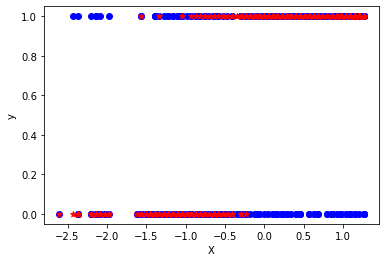

In [18]:
#Visualization of The Predictions
fig1, ax1 = plt.subplots()
ax1.scatter(scaled_X_test[:,0],y_test,color='blue')
ax1.scatter(scaled_X_test[:,0], logre.predict(scaled_X_test),color='red',marker='*')
ax1.set_xlabel('X')
ax1.set_ylabel('y')

In [ ]:
#USING NAIVE BAYES CLASSIFICATION---------------------------------------------------

In [19]:
gnb = GaussianNB()
gnb. fit(scaled_X_train,y_train)

GaussianNB()

In [21]:
print('Number of mislabeled points out of a total %d points : %d'%(scaled_X_test.shape[0],(y_test!= gnb.predict(scaled_X_test)).sum()))

Number of mislabeled points out of a total 447 points : 142


In [22]:
print("The accuracy score is:",accuracy_score(y_test,gnb.predict(scaled_X_test)).round(2)*100,'%')

The accuracy score is: 68.0 %


Text(0, 0.5, 'y')

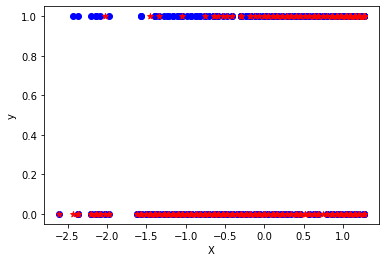

In [23]:
#Visualisation of the Predictions
fig1, ax1 = plt.subplots()
ax1.scatter(scaled_X_test[:,0],y_test,color='blue')
ax1.scatter(scaled_X_test[:,0], gnb.predict(scaled_X_test),color='red',marker='*')
ax1.set_xlabel('X')
ax1.set_ylabel('y')

In [24]:
#CONSTRUCTING NEURAL NETWORKS--------------------------------------------

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,), activation="logistic",
                   random_state=0, max_iter=2000)

In [27]:
mlp.fit(scaled_X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10), max_iter=2000,
              random_state=0)

In [31]:
print('Number of mislabeled points out of a total %d points : %d'%(scaled_X_test.shape[0],(y_test!=mlp.predict(scaled_X_test)).sum()))

Number of mislabeled points out of a total 447 points : 121


In [32]:
print('The Accuracy score is: ',mlp.score(scaled_X_test,y_test).round(2)*100,'%')

The Accuracy score is:  73.0 %


Text(0, 0.5, 'y')

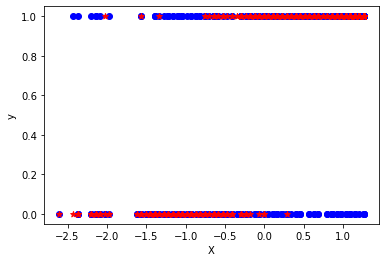

In [33]:
#Visualization of The Predictions
fig1, ax1 = plt.subplots()
ax1.scatter(scaled_X_test[:,0],y_test,color='blue')
ax1.scatter(scaled_X_test[:,0], mlp.predict(scaled_X_test),color='red',marker='*')
ax1.set_xlabel('X')
ax1.set_ylabel('y')